# **1.Tìm ra feature có ảnh hưởng lớn nhất đến target**

In [ ]:
import pandas as pd
data_2015 = pd.read_csv('/content/drive/MyDrive/wh_2015.csv')
data_2016 = pd.read_csv('/content/drive/MyDrive/wh_2016.csv')
data_2017 = pd.read_csv('/content/drive/MyDrive/wh_2017.csv')

In [ ]:
data_2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
data_2015 = data_2015.fillna(data_2015.mean())

<ipython-input-5-7e8d9c49e8ad>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_2015 = data_2015.fillna(data_2015.mean())


In [ ]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 164 non-null    float64
 3   Happiness Score                164 non-null    float64
 4   Standard Error                 164 non-null    float64
 5   Economy (GDP per Capita)       164 non-null    float64
 6   Family                         164 non-null    float64
 7   Health (Life Expectancy)       164 non-null    float64
 8   Freedom                        164 non-null    float64
 9   Trust (Government Corruption)  164 non-null    float64
 10  Generosity                     164 non-null    float64
 11  Dystopia Residual              164 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
corr_matrix = data_2015.corr()

# in ra ma trận tương quan
print(corr_matrix)

                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   
Year                                      NaN              NaN   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254            

<ipython-input-8-21b39970f6d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_2015.corr()


In [ ]:
# Xử lí missing bằng linear_regression
# import pandas as pd

# # Đọc dữ liệu từ file và lấy cột "Region".
# region_col = data_2015['Region']

# # Gán các giá trị giống nhau trong cột "Region" bằng các số nguyên.
# region_col_int, _ = pd.factorize(region_col)

# # In ra cột "Region" đã được gán các giá trị bằng các số nguyên.
# data_temp = data_2015
# data_temp["Region"] = region_col_int
# # Xây dựng một mô hình phân loại để dự đoán giá trị của các mẫu dữ liệu bị thiếu.
# model = RandomForestClassifier()
# model.fit(X, y)

# # Dự đoán giá trị của các mẫu dữ liệu bị thiếu bằng cách sử dụng mô hình phân loại.
# X_missing_region = df_missing_region.drop(['Region','Country'], axis=1)
# predicted_regions = model.predict(X_missing_region)

# # Thay thế các giá trị thiếu bằng giá trị được dự đoán.
# data_temp.loc[data_temp['Region'].isna(), 'Region'] = predicted_regions

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the target variable
y = data_2015["Happiness Score"]

# Define the features
X = data_2015.drop(["Happiness Score", "Country", "Region"] , axis=1)


In [ ]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(model.coef_)

[-4.30444315e-06 -4.45624643e-04  9.99934229e-01  9.99808467e-01
  9.99675370e-01  9.99517581e-01  9.99777639e-01  9.99917604e-01
  9.99862943e-01  0.00000000e+00]


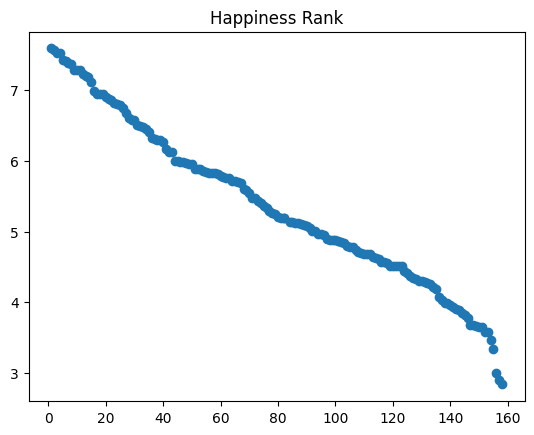

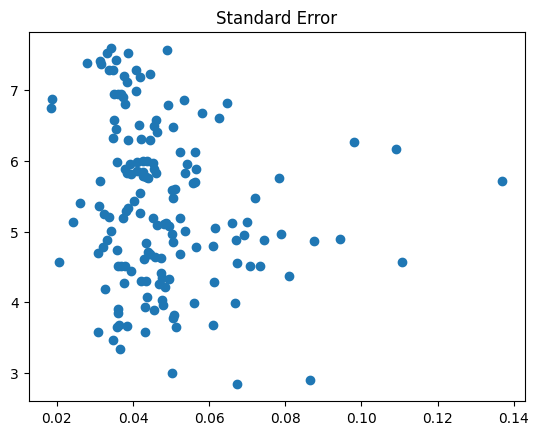

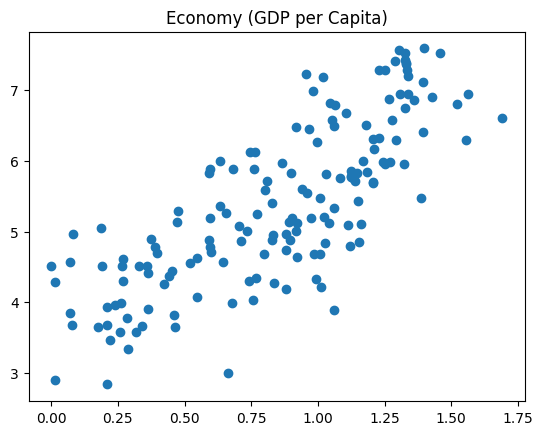

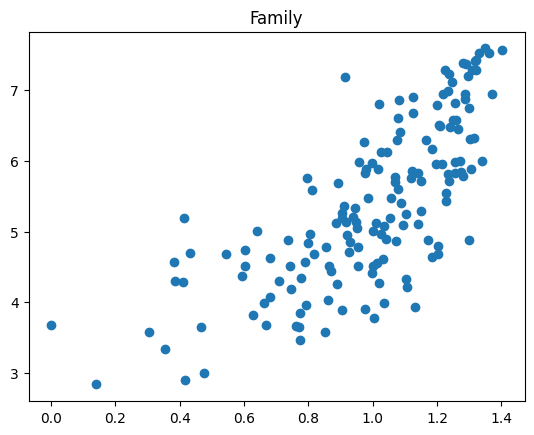

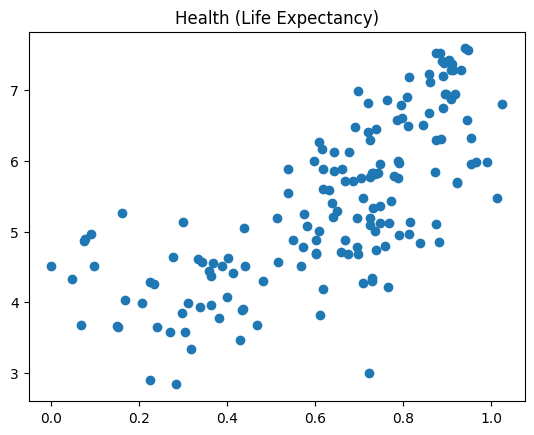

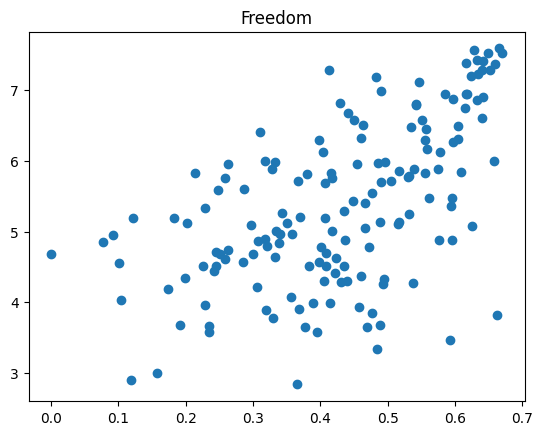

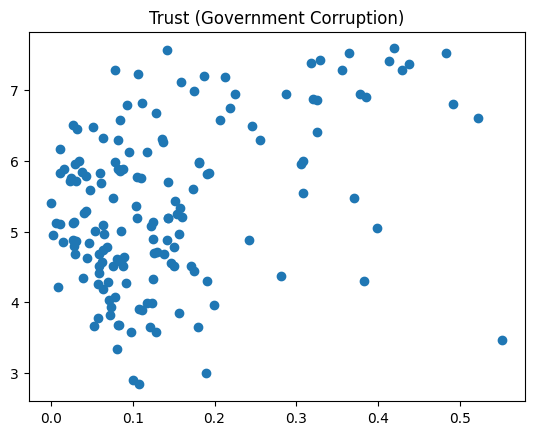

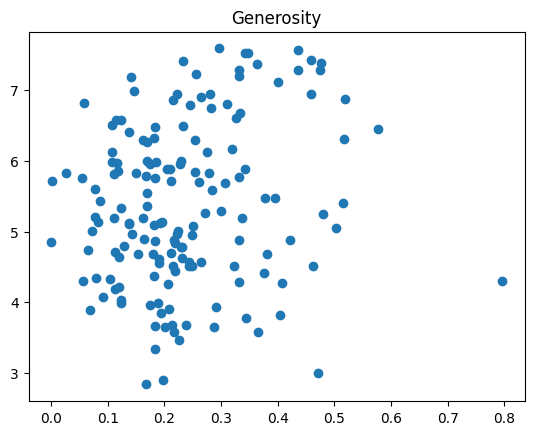

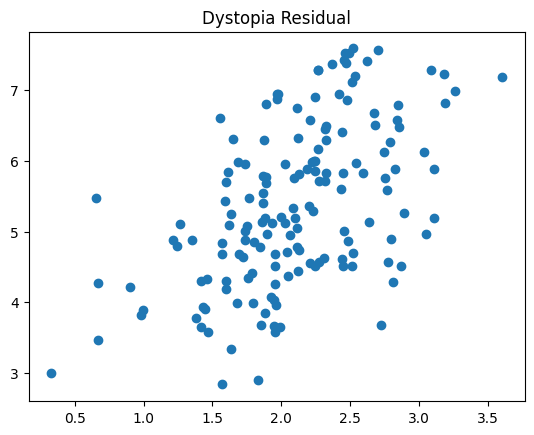

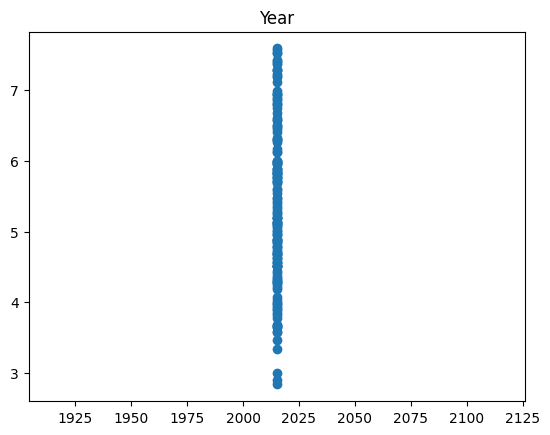

In [ ]:
import matplotlib.pyplot as plt
for feature in X:
    plt.scatter(X[feature], y)
    plt.title(feature)
    plt.show()

# **2.Trực quan hóa dữ liệu để hiểu rõ dữ liệu**

In [ ]:
data_2015['Happiness Score'].describe()

count    164.000000
mean       5.375734
std        1.123739
min        2.839000
25%        4.561250
50%        5.309000
75%        6.139500
max        7.587000
Name: Happiness Score, dtype: float64

In [ ]:
# TRung bình
data_2015['Happiness Score'].mean()

5.37573417721519

In [ ]:
# Trung vị
data_2015['Happiness Score'].median()

5.309000000000001

In [ ]:
# Độ lệch chuẩn
data_2015['Happiness Score'].std()

1.1237387444871756

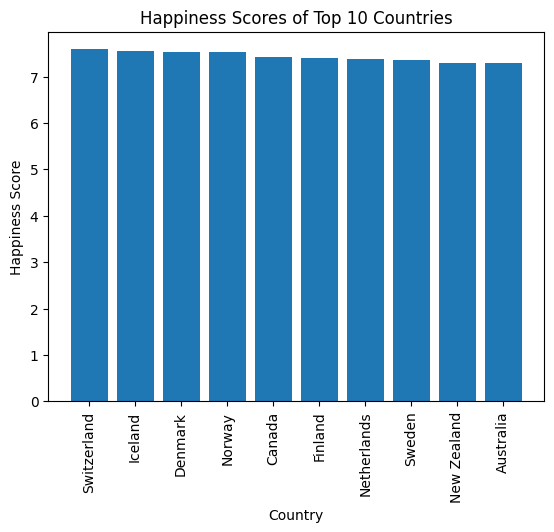

In [ ]:
import matplotlib.pyplot as plt

# Chọn ra 10 dòng đầu tiên và lưu vào dataframe mới
top_10 = data_2015.head(10)

# Vẽ biểu đồ cột
plt.bar(top_10['Country'], top_10['Happiness Score'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Happiness Scores of Top 10 Countries')
plt.show()

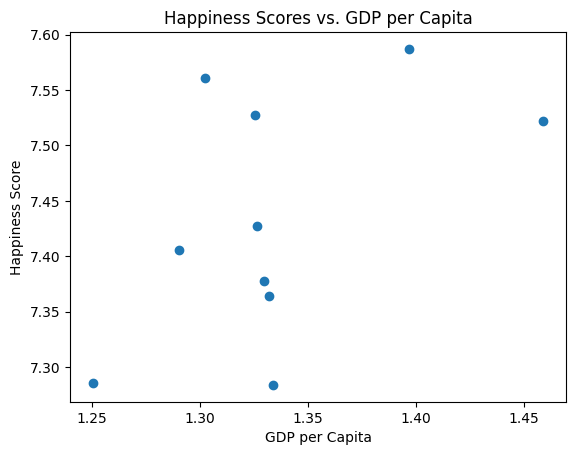

In [ ]:
# Vẽ biểu đồ scatter
plt.scatter(top_10['Economy (GDP per Capita)'], top_10['Happiness Score'])
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Scores vs. GDP per Capita')
plt.show()

# **3.Tính toán mức độ hạnh phúc của các quốc gia theo khu vực**

In [ ]:
# Nhóm các quốc gia theo khu vực và tính trung bình điểm số hạnh phúc của từng khu vực
happiness_by_region = data_2015.groupby('Region')['Happiness Score'].mean()
print(happiness_by_region)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


In [ ]:
# data_2015.fillna('A', inplace=True)

In [ ]:
print(data_2015.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64


In [ ]:
data_2015 = data_2015.dropna(subset=['Region'])

In [ ]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [ ]:
# Tính Happiness Score trung bình của toàn thế giới
global_happiness = data_2015['Happiness Score'].mean()

# Tính trung bình Happiness Score cho mỗi khu vực
region_happiness = data_2015.groupby('Region')['Happiness Score'].mean()

# Tính độ chênh lệch của Happiness Score trung bình của mỗi khu vực so với Happiness Score trung bình của toàn thế giới
correlations = region_happiness - global_happiness

print(correlations)

Region
Australia and New Zealand          1.909266
Central and Eastern Europe        -0.042803
Eastern Asia                       0.250432
Latin America and Caribbean        0.768948
Middle East and Northern Africa    0.031166
North America                      1.897266
Southeastern Asia                 -0.058290
Southern Asia                     -0.794877
Sub-Saharan Africa                -1.172934
Western Europe                     1.313885
Name: Happiness Score, dtype: float64


## **4.Các cách hợp nhất df**
- Merge: Hợp nhất các khung dữ liệu dựa trên một hoặc nhiều cột chung. Các cột chung này có thể được chỉ định bằng các tham số "on" hoặc "left_on" và "right_on" (nếu các cột có tên khác nhau trong các khung dữ liệu được hợp nhất).

- Join: Cũng tương tự như Merge, nhưng hỗ trợ nhiều kiểu kết nối khác nhau (inner join, outer join, left join, right join) để xử lý các giá trị bị thiếu hoặc không khớp.

- Concatenate: Hợp nhất các khung dữ liệu theo chiều dọc hoặc chiều ngang. Điều này được thực hiện bằng cách sử dụng hàm pandas.concat ().

- Append: Thêm các hàng mới vào khung dữ liệu hiện có.

- Melt: Chuyển đổi các cột của khung dữ liệu thành các hàng mới để tạo ra một khung dữ liệu dài và thon hơn.

- Pivot: Chuyển đổi một khung dữ liệu dài và thon thành một khung dữ liệu rộng hơn bằng cách sử dụng giá trị trong một cột để tạo ra các cột mới.

# **5.Hợp nhất 3 df**

In [ ]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    float64
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Happiness.Rank                 155 non-null    float64
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
column_names = data_2017.columns.tolist()
print(column_names)

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year']


In [ ]:
data_2017 = data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score' : 'Happiness Score',
                                      'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                                      'Health..Life.Expectancy.':'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.':'Trust (Government Corruption)',
                                      'Dystopia.Residual':'Dystopia Residual'})


In [ ]:
merged_df_2017 = pd.merge(data_2017, data_2016[['Country', 'Region']], on='Country', how='left')
merged_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Happiness Rank                 155 non-null    float64
 2   Happiness Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy (GDP per Capita)       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health (Life Expectancy)       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust (Government Corruption)  155 non-null    float64
 11  Dystopia Residual              155 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
# Sử dụng phương thức concat() để nối các DataFrame theo chiều dọc
merged_df = pd.concat([data_2015, data_2016, merged_df_2017], ignore_index=True)

In [ ]:
merged_df.head(10)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         472 non-null    object 
 2   Happiness Rank                 470 non-null    float64
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           492 non-null    int

# **6.Hạnh phúc thế giới đã thay đổi như thế nào từ năm 2015 đến năm 2017?**

In [ ]:
global_happiness_2015 = data_2015['Happiness Score'].mean()
global_happiness_2016 = data_2016['Happiness Score'].mean()
global_happiness_2017 = data_2017['Happiness Score'].mean()
x = [global_happiness_2015,global_happiness_2016,global_happiness_2017]
y = [2015,2016,2017]

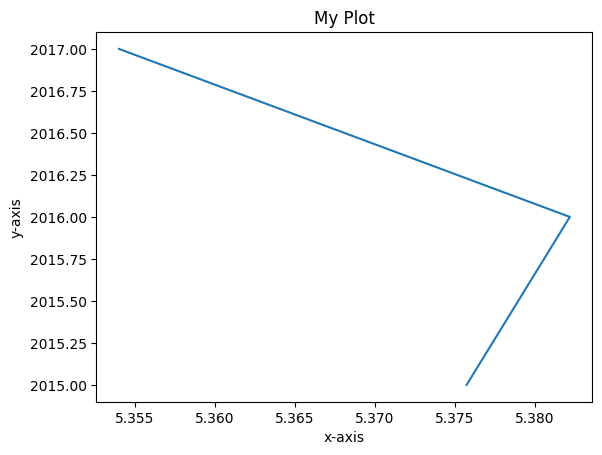

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y)

# Set the title of the plot
plt.title('My Plot')

# Set the x-axis label
plt.xlabel('x-axis')

# Set the y-axis label
plt.ylabel('y-axis')

# Show the plot
plt.show()

### Nhận xét : điểm số hạnh phúc trung bình trên toàn thế giờ từ năm 2015-2017 có sự biến động nhưng không lớn

# **7.Show where these missing values are located by visualizing them with a heatmap, make a brief report of your observations.**

In [ ]:
!pip install missingno

<Axes: >

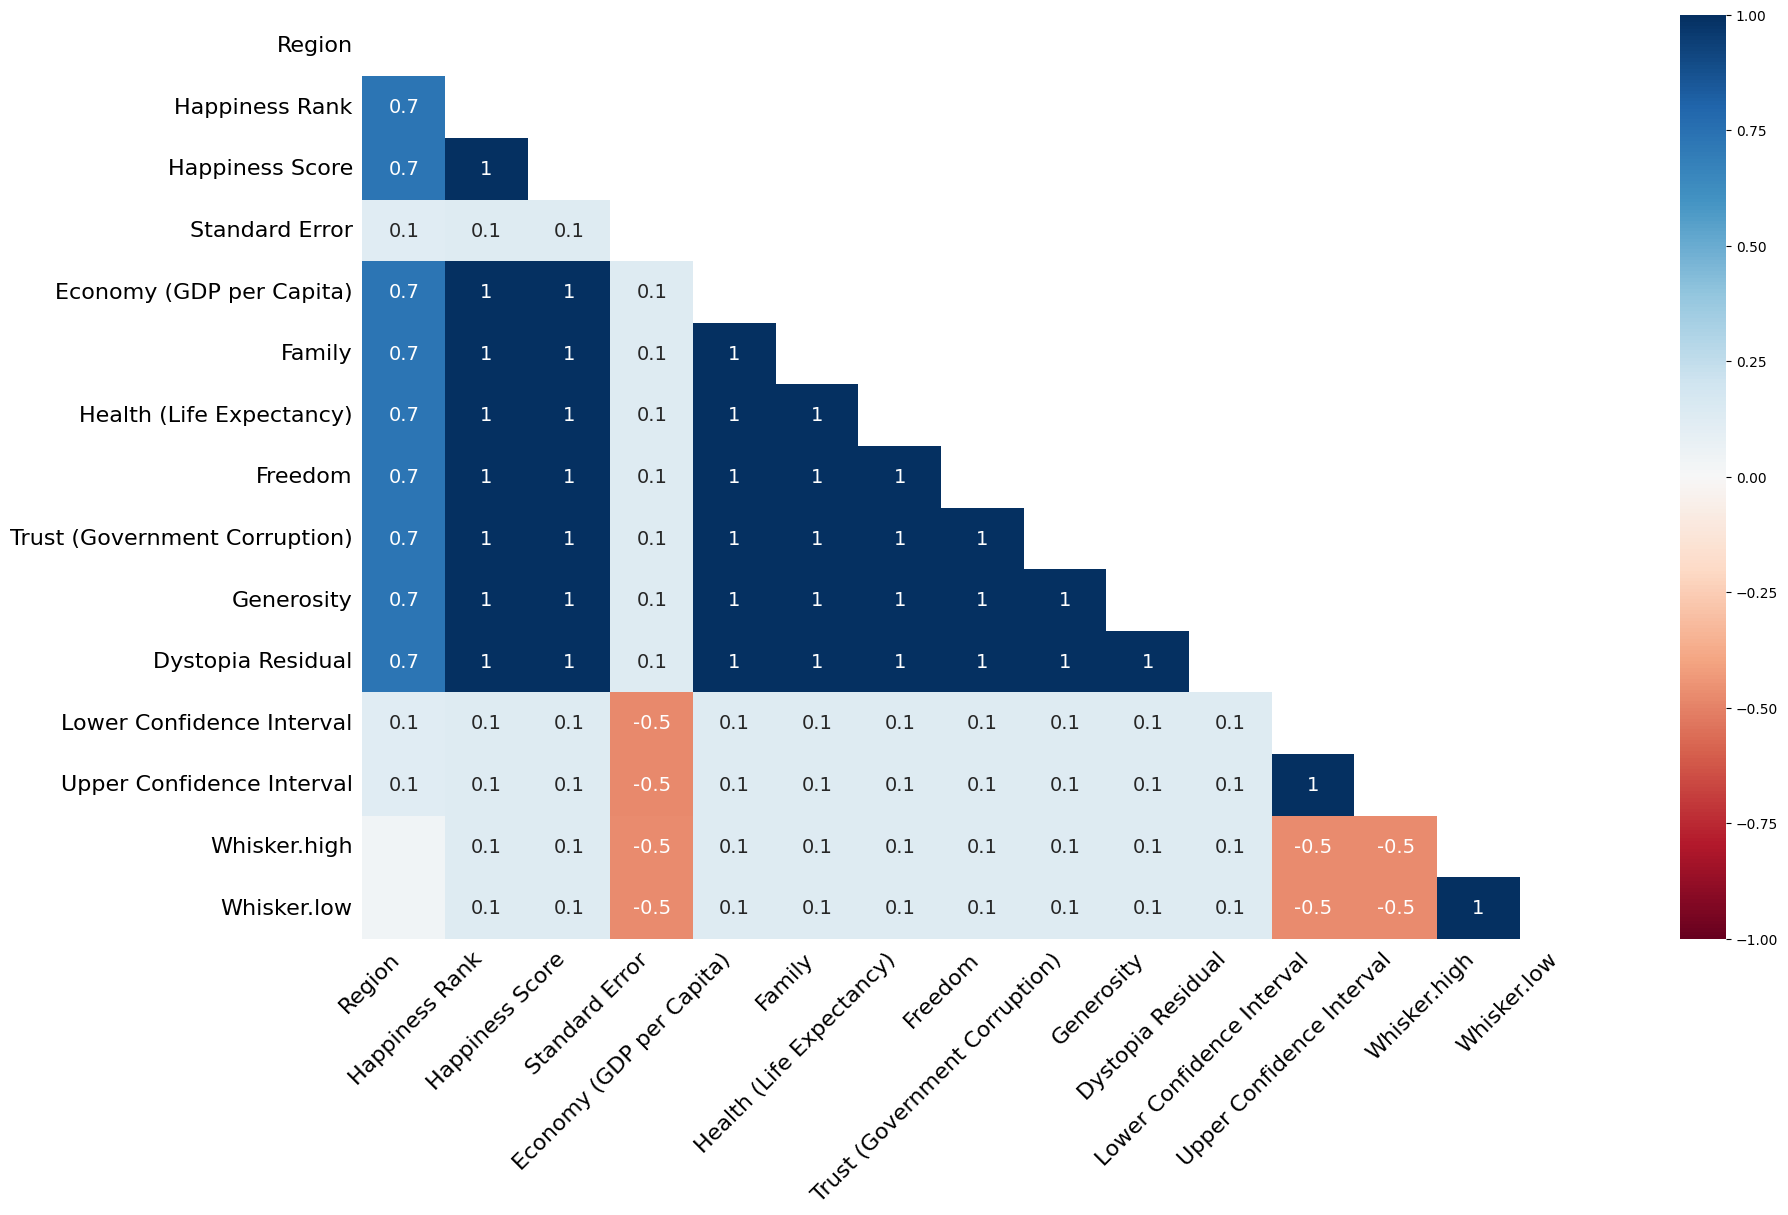

In [ ]:
import missingno as msno
msno.heatmap(merged_df)

Nhận xét :
- Những biến Lower Confidence Interval , Upper Confidence Interval, Whisker.high ,Whisker.low có số lượng missing khá lớn
- Những mẫu bị miss ở những biến này cũng không có mối liên quan với các miss ở những biến khác

# **8.Việc xóa hoặc thay thế các giá trị bị thiếu sẽ ảnh hưởng đến phân tích của chúng tôi như thế nào?**
 - Nếu tỷ lệ của các giá trị bị thiếu là rất thấp và không có mối tương quan đáng kể giữa các giá trị bị thiếu và các giá trị còn lại trong dữ liệu, việc xóa hoặc thay thế các giá trị bị thiếu có thể không ảnh hưởng đến phân tích của chúng ta một cách đáng kể.
 - Nếu tỷ lệ các giá trị bị thiếu trong dữ liệu là cao, hoặc các giá trị bị thiếu là các giá trị quan trọng hoặc có mối tương quan lớn với các giá trị khác trong dữ liệu, việc xóa hoặc thay thế các giá trị bị thiếu có thể làm mất đi nhiều thông tin quan trọng trong dữ liệu và dẫn đến kết quả phân tích không chính xác.

# **8.a.Bao nhiêu phần trăm dữ liệu bị thiếu?**

In [ ]:
merged_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,Latin America and Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
488,Somaliland Region,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
490,Suriname,Latin America and Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


In [ ]:
miss_rate = merged_df.isna().mean().mean() * 100
print("Tỷ lệ missing data trên toàn bộ dataframe: {:.2f}%".format(miss_rate))

Tỷ lệ missing data trên toàn bộ dataframe: 22.67%


# **8.b.Việc loại bỏ các giá trị bị thiếu có khiến chúng tôi mất thông tin có giá trị trong các cột khác không?**
- Có, việc loại bỏ các giá trị bị thiếu có thể làm mất đi thông tin có giá trị trong các cột khác của dữ liệu. Điều này đặc biệt đúng khi các cột trong dữ liệu có một mối tương quan lớn với nhau.

# **9.Chúng tôi có thể xác định bất kỳ mẫu nào trong dữ liệu bị thiếu không?**

## Có thể xác định bằng 1 số pp :
- Kiểm tra hình thức: Một cách để xác định các mô hình của dữ liệu bị thiếu là tạo ra các biểu đồ trực quan như histogram hoặc heatmap để hiển thị phân phối của các giá trị bị thiếu qua các biến hoặc thời gian.
- Phân tích tương quan: Phương pháp này cho phép xác định các mối tương quan giữa dữ liệu bị thiếu và các biến khác, giúp hiểu rõ hơn về mối quan hệ giữa các biến và dữ liệu bị thiếu.
- Mô hình hóa: Mô hình hóa dữ liệu bị thiếu có thể giúp xác định các mô hình của sự thiếu dữ liệu và dự đoán giá trị bị thiếu dựa trên những thông tin có sẵn.

In [ ]:
# số giá trị miss của từng cột
merged_df.isnull().sum()

Country                            0
Region                            14
Happiness Rank                    16
Happiness Score                   16
Standard Error                   328
Economy (GDP per Capita)          16
Family                            16
Health (Life Expectancy)          16
Freedom                           16
Trust (Government Corruption)     16
Generosity                        16
Dystopia Residual                 16
Year                               0
Lower Confidence Interval        329
Upper Confidence Interval        329
Whisker.high                     331
Whisker.low                      331
dtype: int64

In [ ]:
import seaborn as sns
sns.heatmap(merged_df.isnull(), cmap='viridis')

# **Clean data**

In [ ]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    float64
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Happiness.Rank                 155 non-null    float64
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
# Nhận thấy data_2017 có nhiều cột khác column tiến hành đổi lại tên
data_2017 = data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score' : 'Happiness Score',
                                      'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                                      'Health..Life.Expectancy.':'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.':'Trust (Government Corruption)',
                                      'Dystopia.Residual':'Dystopia Residual'})

In [ ]:
# data_2017 thiếu column Region nên lấy tên khu vực năm 2016 để ghép
merged_df_2017 = pd.merge(data_2017, data_2016[['Country', 'Region']], on='Country', how='left')
merged_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Happiness Rank                 155 non-null    float64
 2   Happiness Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy (GDP per Capita)       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health (Life Expectancy)       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust (Government Corruption)  155 non-null    float64
 11  Dystopia Residual              155 non-null    float64
 12  Year                           164 non-null    int

In [ ]:
# Sử dụng phương thức concat() để nối các DataFrame theo chiều dọc
merged_df = pd.concat([data_2015, data_2016, merged_df_2017], ignore_index=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         472 non-null    object 
 2   Happiness Rank                 470 non-null    float64
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           492 non-null    int

In [ ]:
# Biến Standard Error , Lower Confidence Interval , Upper Confidence Interval , Whisker.low ,Whisker.high  số lượng missing quá lớn
# vì thế ta sử dụng drop variable cho những loại biến trên
cols_to_drop = ['Standard Error' , 'Lower Confidence Interval' , 'Upper Confidence Interval' , 'Whisker.low' ,'Whisker.high']
merged_df = merged_df.drop(columns=cols_to_drop)

In [ ]:

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         472 non-null    object 
 2   Happiness Rank                 470 non-null    float64
 3   Happiness Score                470 non-null    float64
 4   Economy (GDP per Capita)       470 non-null    float64
 5   Family                         470 non-null    float64
 6   Health (Life Expectancy)       470 non-null    float64
 7   Freedom                        470 non-null    float64
 8   Trust (Government Corruption)  470 non-null    float64
 9   Generosity                     470 non-null    float64
 10  Dystopia Residual              470 non-null    float64
 11  Year                           492 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 4

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-custom-user-agent")

# Chuyển đổi tên đất nước thành tọa độ địa lý
location = geolocator.geocode("Switzerland")
print((location.latitude, location.longitude))

(46.7985624, 8.2319736)


#Xác định vấn đề
Cần xác định region của các mẫu bị miss dữ liệu , nếu có được region sẽ có thể điền các giá trị trung bình tương ứng của các khu vực
# **Region**
- ta sẽ chuyển đổi tên đất nước thành tọa độ
- sử dụng k-NN để xác định những khu vực của các nước bị thiếu region

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd

geolocator = Nominatim(user_agent="my-custom-user-agent")

# Tìm kiếm tọa độ của các quốc gia
latitudes = []
longitudes = []
data_location = merged_df[['Country','Region']]
for index,value in merged_df['Country'].iteritems():
    location = geolocator.geocode(value)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)

data_location['latitude'] = latitudes
data_location['longitude'] = longitudes
# Tạo DataFrame mới chỉ chứa các cột Country, Region và Toado


<ipython-input-12-e5dc332d0352>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index,value in merged_df['Country'].iteritems():
<ipython-input-12-e5dc332d0352>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location['latitude'] = latitudes
<ipython-input-12-e5dc332d0352>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location['longitude'] = longitudes


In [ ]:
data_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    492 non-null    object 
 1   Region     472 non-null    object 
 2   latitude   492 non-null    float64
 3   longitude  492 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.5+ KB


In [ ]:
test = data_location

In [ ]:
# Chuyển đổi Region thành dạng số để fit vào mô hình
import pandas as pd
import numpy as np

# Tạo bản đồ giá trị từ các giá trị duy nhất trong cột "Region"
region_map = {val: i for i, val in enumerate(data_location['Region'].dropna().unique())}

# Thêm giá trị NaN vào bản đồ giá trị
region_map[np.nan] = np.nan

# Ánh xạ các giá trị trong cột "Region" sang các giá trị số nguyên
data_location['Region'] = data_location['Region'].map(region_map, na_action='ignore')

<ipython-input-15-16c755d2eb7a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location['Region'] = data_location['Region'].map(region_map, na_action='ignore')


In [ ]:
data_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    492 non-null    object 
 1   Region     472 non-null    float64
 2   latitude   492 non-null    float64
 3   longitude  492 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.5+ KB


In [ ]:
# SỬ dụng K-NN với n=5 với các biến là tọa độ của các nước
from sklearn.neighbors import KNeighborsClassifier

# Tách các hàng có giá trị Region bị thiếu ra khỏi DataFrame
df_missing = data_location[data_location['Region'].isnull()]
df_not_missing = data_location[~data_location['Region'].isnull()]

# Tạo mô hình K-nn với k=1
knn = KNeighborsClassifier(n_neighbors=5)

# Đưa các giá trị latitude và longitude vào mô hình K-nn
knn.fit(df_not_missing[['latitude', 'longitude']], df_not_missing['Region'])

# Dự đoán giá trị Region cho các hàng bị thiếu bằng cách tìm hàng tương tự nhất
predicted_regions = knn.predict(df_missing[['latitude', 'longitude']])

# Điền giá trị Region bị thiếu vào DataFrame ban đầu
data_location.loc[data_location['Region'].isnull(), 'Region'] = predicted_regions

In [ ]:
data_location

,Country,Region,latitude,longitude
0,Switzerland,0.0,46.798562,8.231974
1,Iceland,0.0,64.984182,-18.105901
2,Denmark,0.0,55.670249,10.333328
3,Norway,0.0,61.152939,8.787665
4,Canada,1.0,61.066692,-107.991707
...,...,...,...,...
487,Puerto Rico,4.0,18.224771,-66.485829
488,Somaliland Region,8.0,10.374367,45.109858
489,Somaliland region,8.0,10.374367,45.109858
490,Suriname,4.0,4.141303,-56.077119


In [ ]:
merged_df['Region']=data_location['Region']

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         492 non-null    float64
 2   Happiness Rank                 470 non-null    float64
 3   Happiness Score                470 non-null    float64
 4   Economy (GDP per Capita)       470 non-null    float64
 5   Family                         470 non-null    float64
 6   Health (Life Expectancy)       470 non-null    float64
 7   Freedom                        470 non-null    float64
 8   Trust (Government Corruption)  470 non-null    float64
 9   Generosity                     470 non-null    float64
 10  Dystopia Residual              470 non-null    float64
 11  Year                           492 non-null    int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
merged_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [ ]:
# Điền các giá trị bằng giá trị trung bình của khu vực đất nước đó
test = merged_df
columns = ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
for i in range(len(test)):
    for j in range(3,len(test.columns)-1):
        temp = test.groupby('Region')[columns[j-3]].mean()
        if pd.isnull(test.iloc[i, j]):
            index = test.iloc[i,1]
            test.iloc[i, j] = temp[index]


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         492 non-null    float64
 2   Happiness Rank                 470 non-null    float64
 3   Happiness Score                492 non-null    float64
 4   Economy (GDP per Capita)       492 non-null    float64
 5   Family                         492 non-null    float64
 6   Health (Life Expectancy)       492 non-null    float64
 7   Freedom                        492 non-null    float64
 8   Trust (Government Corruption)  492 non-null    float64
 9   Generosity                     492 non-null    float64
 10  Dystopia Residual              492 non-null    float64
 11  Year                           492 non-null    int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
df_sorted = test.sort_values(by='Happiness Score',ascending=False)
df_sorted = df_sorted.reset_index(drop=True)

In [ ]:
df_sorted.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,0.0,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,0.0,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Norway,0.0,1.0,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
3,Denmark,0.0,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
4,Denmark,0.0,1.0,7.526,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.739390,2016
5,Norway,0.0,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
6,Denmark,0.0,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
7,Switzerland,0.0,2.0,7.509,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2.694630,2016
8,Iceland,0.0,3.0,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
9,Iceland,0.0,3.0,7.501,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2.831370,2016


In [ ]:
j = 1
for i in range(len(df_sorted)):
        df_sorted.loc[i, 'Happiness Rank'] = j
        j += 1

In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         492 non-null    float64
 2   Happiness Rank                 492 non-null    float64
 3   Happiness Score                492 non-null    float64
 4   Economy (GDP per Capita)       492 non-null    float64
 5   Family                         492 non-null    float64
 6   Health (Life Expectancy)       492 non-null    float64
 7   Freedom                        492 non-null    float64
 8   Trust (Government Corruption)  492 non-null    float64
 9   Generosity                     492 non-null    float64
 10  Dystopia Residual              492 non-null    float64
 11  Year                           492 non-null    int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
df_sorted.drop('Happiness Rank', axis=1, inplace=True)

In [ ]:
df_sorted_test = df_sorted
df_sorted_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        492 non-null    object 
 1   Region                         492 non-null    float64
 2   Happiness Score                492 non-null    float64
 3   Economy (GDP per Capita)       492 non-null    float64
 4   Family                         492 non-null    float64
 5   Health (Life Expectancy)       492 non-null    float64
 6   Freedom                        492 non-null    float64
 7   Trust (Government Corruption)  492 non-null    float64
 8   Generosity                     492 non-null    float64
 9   Dystopia Residual              492 non-null    float64
 10  Year                           492 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 42.4+ KB


In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Xử lý ngoại lệ bằng phương pháp Winsorize cho từng cột
for col in df_sorted.columns[1:]:
    df_sorted[col] = winsorize(df_sorted[col], limits=[0.1, 0.1])

# In ra DataFrame mới đã được xử lý ngoại lệ
df_sorted

In [ ]:
!pip install seaborn

<ipython-input-64-9e6645e48995>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_sorted_test.corr()


<Axes: >

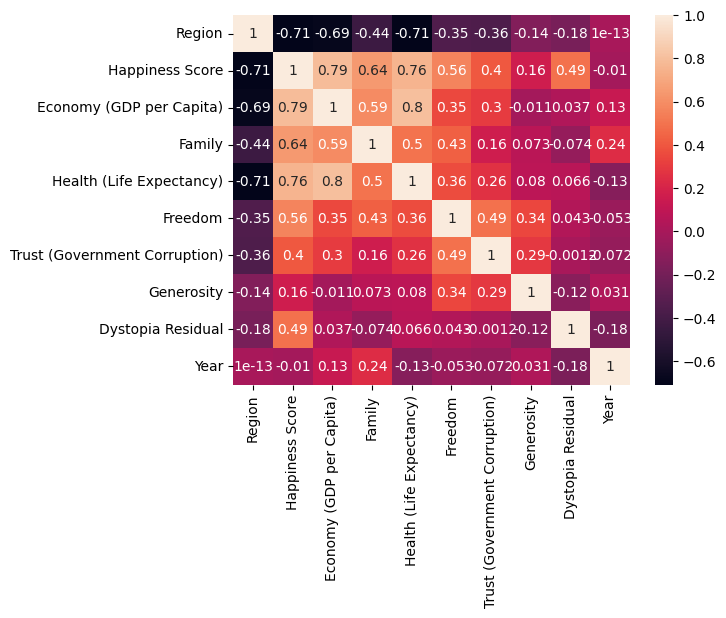

In [ ]:
import seaborn as sns
corr_matrix = df_sorted_test.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
df_sorted_test.drop_duplicates(subset=['Happiness Score', 'Country', 'Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)'], inplace=True)
df_sorted_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 487
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        459 non-null    object 
 1   Region                         459 non-null    float64
 2   Happiness Score                459 non-null    float64
 3   Economy (GDP per Capita)       459 non-null    float64
 4   Family                         459 non-null    float64
 5   Health (Life Expectancy)       459 non-null    float64
 6   Freedom                        459 non-null    float64
 7   Trust (Government Corruption)  459 non-null    float64
 8   Generosity                     459 non-null    float64
 9   Dystopia Residual              459 non-null    float64
 10  Year                           459 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 43.0+ KB


In [ ]:
df_sorted_test.head(10)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,0.0,6.951,1.39651,1.349510,0.851200,0.58557,0.308260,0.296780,2.517380,2015
1,Iceland,0.0,6.951,1.30232,1.384565,0.851200,0.58557,0.141450,0.427858,2.702010,2015
2,Norway,0.0,6.951,1.42727,1.384565,0.796667,0.58557,0.308260,0.362012,2.277027,2017
3,Denmark,0.0,6.951,1.32548,1.360580,0.851200,0.58557,0.308260,0.341390,2.492040,2015
4,Denmark,0.0,6.951,1.42727,1.163740,0.795040,0.57941,0.308260,0.361710,2.739390,2016
7,Switzerland,0.0,6.951,1.42727,1.145240,0.851200,0.58557,0.308260,0.280830,2.694630,2016
8,Iceland,0.0,6.951,1.42727,1.384565,0.833552,0.58557,0.153527,0.427858,2.322715,2017
9,Iceland,0.0,6.951,1.42666,1.183260,0.851200,0.56624,0.149750,0.427858,2.807808,2016
12,Finland,0.0,6.951,1.42727,1.384565,0.809158,0.58557,0.308260,0.245483,2.430182,2017
13,Canada,1.0,6.951,1.32629,1.322610,0.851200,0.58557,0.308260,0.427858,2.451760,2015
